In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/Credit.csv")
df = df.drop(labels=["Unnamed: 0"], axis=1)
df.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [2]:
X = df.drop(labels=["ID", "Student"], axis=1)

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = df[["Student"]]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2))
model = abc.fit(X_train, y_train)
pred = model.predict(X_test)
print(pred)
proba = model.predict_proba(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No']


In [24]:
from sklearn.metrics import accuracy_score, f1_score, auc, confusion_matrix, roc_auc_score, roc_curve, classification_report
acc = accuracy_score(y_test, pred)
print(acc)
print(f1_score(y_test, pred, labels=["Yes", "No"], average=None))
confusion_matrix(y_test, pred)

0.9333333333333333
[0.6        0.96363636]


array([[106,   3],
       [  5,   6]], dtype=int64)

In [25]:
# print(model.classes_)
# print(proba)
not_student_proba = proba[:, 1]
fpr, tpr, threshold = roc_curve(y_test, not_student_proba, pos_label="No")
roc_auc = auc(fpr, tpr)
roc_auc

0.14929107589658047

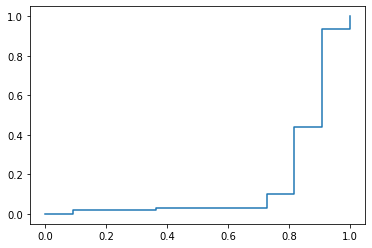

In [26]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, roc_auc, label=roc_auc)

In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          No       0.95      0.97      0.96       109
         Yes       0.67      0.55      0.60        11

    accuracy                           0.93       120
   macro avg       0.81      0.76      0.78       120
weighted avg       0.93      0.93      0.93       120

